# Scrapbook

In this notebook we investigate how to build a working pipeline.

It needs the following elements:

* Scrap the GitHub page of the provided username
* Select the relevant UI elements
* Compute the color distribution
* Create a blank image
* Randomly create a GitHub looking logo based on the distribution
* Save picture if satisfied

## Imports

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt

## Scrap the GitHub page of the provided username

In [31]:
username = "inzouzouwetrust"
username = "agramfort"
url = f"https://github.com/{username}"

In [3]:
requests = requests.get(url)

In [4]:
data = requests.text

## Select the relevant HTML elements

In [5]:
soup = BeautifulSoup(data, features="lxml")

In [6]:
days = soup.find_all("rect")

In [7]:
fill_values = [d["fill"] for d in days]

## Compute the color distribution

In [8]:
colors, counts = np.unique(fill_values, return_counts=True)

In [15]:
colors, counts

(array(['#196127', '#239a3b', '#7bc96f', '#c6e48b', '#ebedf0'], dtype='<U7'),
 array([  8,  11,  47, 239,  63]))

In [10]:
COLORS = {'#196127': [25, 97, 39],
          '#239a3b': [35, 154, 59],
          '#7bc96f': [123, 201, 111],
          '#c6e48b': [198, 228, 139],
          '#ebedf0': [235, 237, 240]}

## Create a blank image

In [29]:
def create_logo(margin=20, block=50):
    """
    Create random GitHub logo
    """
    side = 2 * margin + 5 * block
    
    img = np.zeros((side, side, 3), dtype='uint8')
    img[:, :] = COLORS['#ebedf0']
    
    choices = np.random.choice(colors, size=15, replace=True, p=counts / sum(counts))
    
    counter = 0
    try:
        for i in range(margin, side - block, block):
            for j in range(margin, side - block, block):
                img[j:j+block,i:i+block] = COLORS[choices[counter]]
                counter += 1
    except:
        pass
    
    # Induce symmetry
    img[:,side//2:] = img[:,:side//2][:,::-1]
    
    return img

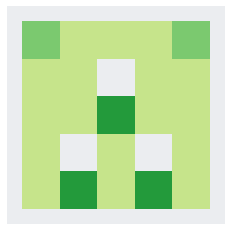

In [30]:
img = create_logo()
plt.imshow(img)
plt.axis("off");